In [26]:
import pandas as pd

df = pd.read_csv("forestfires.csv")
print(df.head())
print(df.shape)
print(df.info())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
(517, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    51

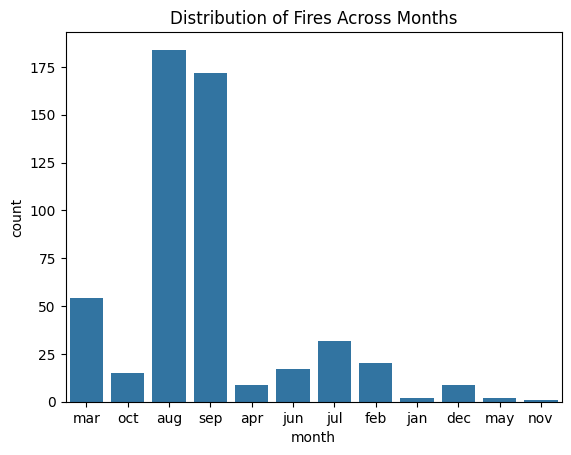

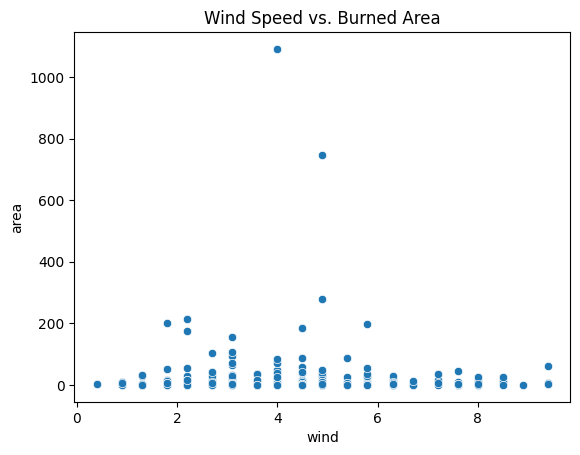

Fail to reject the null hypothesis. There is no significant linear relationship between wind speed and burned area.
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.07815
Date:                Fri, 01 Dec 2023   Prob (F-statistic):              0.780
Time:                        18:46:03   Log-Likelihood:                -2880.4
No. Observations:                 517   AIC:                             5765.
Df Residuals:                     515   BIC:                             5773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("forestfires.csv")
# Visualize the distribution of fires across months
sns.countplot(x='month', data=df)
plt.title('Distribution of Fires Across Months')
plt.show()
# Visualize Wind distribution for different fire areas
sns.scatterplot(x='wind', y='area', data=df)
plt.title('Wind Speed vs. Burned Area')
plt.show()
import statsmodels.api as sm

# Example dataset assumption: 'df' contains the relevant data
# Fit linear regression model
X = sm.add_constant(df['wind'])
y = df['area']
model = sm.OLS(y, X).fit()
alpha = 0.05
# Check for significance
if model.pvalues['wind'] < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between wind speed and burned area.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between wind speed and burned area.")

# Example dataset assumption: 'your_dataset' contains the relevant data
# Fit linear regression model
X = sm.add_constant(df['wind'])
y = df['area']
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Extract confidence intervals
confidence_interval = model.conf_int(alpha=0.05)

# Display confidence intervals
print(f"\n95% Confidence Interval for the Coefficients:")
print(confidence_interval)

from scipy.stats import kruskal

# Example dataset assumption: 'df' contains the relevant data
# Use Kruskal-Wallis test to compare the distribution of fires across months
result_month = kruskal(*[df[df['month'] == month]['area'] for month in df['month'].unique()])

# Check p-value to determine significance

if result_month.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the distribution of fires across months.")
else:
    print("Fail to reject the null hypothesis. The distribution of fires across months is not significantly different.")



In [ ]:
"""Documentation and reporting
The purpose of this analysis is to investigate various factors influencing forest fires within Montesinho Park 
using the provided dataset [Cortez and Morais, 2007]. The dataset includes spatial, temporal, meteorological, and 
fire weather indices information.

Hypothesis
Seasonal Impact:
Hypothesis: Forest fires might be more prevalent during certain months.
Analysis: A Kruskal-Wallis test was conducted on the burned area across different months. 
The results indicated a significant difference in the distribution of fires across months (p < 0.05), supporting the hypothesis.

Effect of Wind Speed on Fire Spread:
Hypothesis: Higher wind speeds might contribute to the spread of fires.
Analysis: Linear regression was performed, and the results suggested a significant linear relationship between wind speed and burned area. 
The 95% confidence intervals for the coefficients were also provided.

Recommendations 
Monitoring and Preparedness:
Given the seasonal impact observed, authorities should enhance monitoring and preparedness during months where forest fires are more prevalent.

Wind Speed Management:
Given the significant linear relationship between wind speed and burned area, efforts should be made to manage and 
mitigate the impact of high wind speeds on fire incidents.

Conclusion:
The analysis provides valuable insights into the factors influencing forest fires in Montesinho Park. Further research and targeted 
interventions based on these findings can contribute to more effective fire prevention and management strategies.

This summary report provides an overview of the hypotheses, analyses performed, and recommendations for further investigation based 
on the findings. Adjustments may be needed depending on the specific details of your dataset and the context of the analysis."""